<a href="https://colab.research.google.com/github/gulabpatel/AutoML/blob/main/EvalLML_breast_canser_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

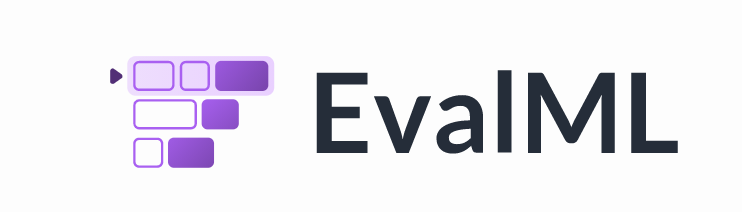

EvalML AutoML Library To Automate Feature Engineering, Feature Selection,Model Creation And Tuning


Documentation : https://evalml.alteryx.com/en/stable/

Video help i available on : https://www.youtube.com/watch?v=uuYEQqrExBQ&t=6s

In [1]:
!pip install evalml

     |████████████████████████████████| 6.2MB 4.6MB/s 
     |████████████████████████████████| 215kB 43.9MB/s 
     |████████████████████████████████| 18.0MB 217kB/s 
     |████████████████████████████████| 13.2MB 175kB/s 
     |████████████████████████████████| 9.5MB 22.9MB/s 
     |████████████████████████████████| 81kB 9.5MB/s 
     |████████████████████████████████| 92kB 10.5MB/s 
     |████████████████████████████████| 5.7MB 37.0MB/s 
     |████████████████████████████████| 1.8MB 37.5MB/s 
     |████████████████████████████████| 358kB 45.4MB/s 
     |████████████████████████████████| 296kB 45.7MB/s 
     |████████████████████████████████| 79.9MB 117kB/s 
     |████████████████████████████████| 22.3MB 66.0MB/s 
     |████████████████████████████████| 6.7MB 40.4MB/s 
     |████████████████████████████████| 10.3MB 40.2MB/s 
     |████████████████████████████████| 102kB 11.0MB/s 
     |████████████████████████████████| 67.3MB 60kB/s 
     |████████████████████████████████| 296kB 52.3M

### Loading The Dataset
- We can also read the dataset from csv
- then convert to datatable

In [1]:
import evalml
X, y = evalml.demos.load_breast_cancer()
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(X, y, problem_type='binary')

2021-04-14 09:21:21,247 featuretools - WARNING    Featuretools failed to load plugin nlp_primitives from library nlp_primitives. For a full stack trace, set logging to debug.


In [2]:
X_train.head()

Data Column,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
Physical Type,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
Logical Type,Double,Double,Double,Double,Double,Double,Double,Double,Double,Double,Double,Double,Double,Double,Double,Double,Double,Double,Double,Double,Double,Double,Double,Double,Double,Double,Double,Double,Double,Double
Semantic Tag(s),['numeric'],['numeric'],['numeric'],['numeric'],['numeric'],['numeric'],['numeric'],['numeric'],['numeric'],['numeric'],['numeric'],['numeric'],['numeric'],['numeric'],['numeric'],['numeric'],['numeric'],['numeric'],['numeric'],['numeric'],['numeric'],['numeric'],['numeric'],['numeric'],['numeric'],['numeric'],['numeric'],['numeric'],['numeric'],['numeric']
381,11.04,14.93,70.67,372.7,0.07987,0.07079,0.03546,0.020740,0.2003,0.06246,0.1642,1.0310,1.281,11.68,0.005296,0.01903,0.01723,0.006960,0.01880,0.001941,12.090,20.83,79.73,447.1,0.1095,0.1982,0.15530,0.06754,0.3202,0.07287
144,10.75,14.97,68.26,355.3,0.07793,0.05139,0.02251,0.007875,0.1399,0.05688,0.2525,1.2390,1.806,17.74,0.006547,0.01781,0.02018,0.005612,0.01671,0.002360,11.950,20.72,77.79,441.2,0.1076,0.1223,0.09755,0.03413,0.2300,0.06769
136,11.71,16.67,74.72,423.6,0.10510,0.06095,0.03592,0.026000,0.1339,0.05945,0.4489,2.5080,3.258,34.37,0.006578,0.01380,0.02662,0.013070,0.01359,0.003707,13.330,25.48,86.16,546.7,0.1271,0.1028,0.10460,0.06968,0.1712,0.07343
116,8.95,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.023080,0.1305,0.07163,0.3132,0.9789,3.280,16.94,0.018350,0.06760,0.09263,0.023080,0.02384,0.005601,9.414,17.07,63.34,270.0,0.1179,0.1879,0.15440,0.03846,0.1652,0.07722
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.152000,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.016640,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.1650,0.8681,0.93870,0.26500,0.4087,0.12400


### Running the AutoML to select the best algorithm

In [3]:
import evalml
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>]

In [4]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='binary')
automl.search()

Using default limit of max_batches=1.

Generating pipelines to search over...
*****************************
* Beginning pipeline search *
*****************************

Optimizing for Log Loss Binary. 
Lower score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 1 batches for a total of 9 pipelines. 
Allowed model families: lightgbm, decision_tree, random_forest, extra_trees, linear_model, catboost, xgboost



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Batch 1: (1/9) Mode Baseline Binary Classification P... Elapsed:00:00
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 12.904
Batch 1: (2/9) Decision Tree Classifier w/ Imputer      Elapsed:00:00
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 2.432
High coefficient of variation (cv >= 0.2) within cross validation scores. Decision Tree Classifier w/ Imputer may not perform as estimated on unseen data.
Batch 1: (3/9) LightGBM Classifier w/ Imputer           Elapsed:00:01
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.133
Batch 1: (4/9) Extra Trees Classifier w/ Imputer        Elapsed:00:02
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.137
Batch 1: (5/9) Elastic Net Classifier w/ Imputer + S... Elapsed:00:04
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.506
Batch 1: (6/9) CatBoost Classifier w/ Imputer           Elapsed:00:06
	Sta

In [5]:
automl.rankings

,id,pipeline_name,score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,8,Logistic Regression Classifier w/ Imputer + St...,0.094015,0.060529,99.271446,True,{'Imputer': {'categorical_impute_strategy': 'm...
1,6,XGBoost Classifier w/ Imputer,0.113098,0.069048,99.123568,True,{'Imputer': {'categorical_impute_strategy': 'm...
2,7,Random Forest Classifier w/ Imputer,0.119972,0.099614,99.070299,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,2,LightGBM Classifier w/ Imputer,0.132722,0.110679,98.971496,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,3,Extra Trees Classifier w/ Imputer,0.136959,0.111169,98.938661,False,{'Imputer': {'categorical_impute_strategy': 'm...
5,5,CatBoost Classifier w/ Imputer,0.386387,0.374338,97.005774,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,4,Elastic Net Classifier w/ Imputer + Standard S...,0.505862,0.496767,96.079926,False,{'Imputer': {'categorical_impute_strategy': 'm...
7,1,Decision Tree Classifier w/ Imputer,2.431916,2.726782,81.154350,True,{'Imputer': {'categorical_impute_strategy': 'm...
8,0,Mode Baseline Binary Classification Pipeline,12.904388,12.952041,0.000000,False,{'Baseline Classifier': {'strategy': 'mode'}}


### Getting The Best Pipeline

In [6]:
automl.best_pipeline

GeneratedPipeline(parameters={'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Logistic Regression Classifier':{'penalty': 'l2', 'C': 1.0, 'n_jobs': -1, 'multi_class': 'auto', 'solver': 'lbfgs'},})

In [7]:
best_pipeline=automl.best_pipeline

### Let's Check the detailed desscription

In [9]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])

***************************************************************
* Logistic Regression Classifier w/ Imputer + Standard Scaler *
***************************************************************

Problem Type: binary
Model Family: Linear

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Standard Scaler
3. Logistic Regression Classifier
	 * penalty : l2
	 * C : 1.0
	 * n_jobs : -1
	 * multi_class : auto
	 * solver : lbfgs

Training
Training for binary problems.
Total training time (including CV): 2.7 seconds

Cross Validation
----------------
             Log Loss Binary  MCC Binary   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary  Sensitivity at Low Alert Rates # Training # Validation
0                      0.061       0.958 0.997      0.966 0.974                     0.981            0.980                           0.412    303.000      152.000
1 

In [10]:
### Evaluate on hold out data
best_pipeline.score(X_test, y_test, objectives=["auc","f1","Precision","Recall"])

OrderedDict([('AUC', 0.9933862433862434),
             ('F1', 0.963855421686747),
             ('Precision', 0.975609756097561),
             ('Recall', 0.9523809523809523)])

### We can also optimize for a problem specific objective

In [11]:
automl_auc = AutoMLSearch(X_train=X_train, y_train=y_train,
                          problem_type='binary',
                          objective='auc',
                          additional_objectives=['f1', 'precision'],
                          max_batches=1,
                          optimize_thresholds=True)

automl_auc.search()

Generating pipelines to search over...
*****************************
* Beginning pipeline search *
*****************************

Optimizing for AUC. 
Greater score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 1 batches for a total of 9 pipelines. 
Allowed model families: lightgbm, decision_tree, random_forest, extra_trees, linear_model, catboost, xgboost



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Batch 1: (1/9) Mode Baseline Binary Classification P... Elapsed:00:00
	Starting cross validation
	Finished cross validation - mean AUC: 0.500
Batch 1: (2/9) Decision Tree Classifier w/ Imputer      Elapsed:00:00
	Starting cross validation
	Finished cross validation - mean AUC: 0.923
Batch 1: (3/9) LightGBM Classifier w/ Imputer           Elapsed:00:01
	Starting cross validation
	Finished cross validation - mean AUC: 0.991
Batch 1: (4/9) Extra Trees Classifier w/ Imputer        Elapsed:00:02
	Starting cross validation
	Finished cross validation - mean AUC: 0.993
Batch 1: (5/9) Elastic Net Classifier w/ Imputer + S... Elapsed:00:04
	Starting cross validation
	Finished cross validation - mean AUC: 0.985
Batch 1: (6/9) CatBoost Classifier w/ Imputer           Elapsed:00:05
	Starting cross validation
	Finished cross validation - mean AUC: 0.991
Batch 1: (7/9) XGBoost Classifier w/ Imputer            Elapsed:00:06
	Starting cross validation
	Finished cross validation - mean AUC: 0.991
Batch 

In [12]:
automl_auc.rankings

,id,pipeline_name,score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,3,Extra Trees Classifier w/ Imputer,0.992791,0.995753,49.279119,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,7,Random Forest Classifier w/ Imputer,0.992482,0.994367,49.248175,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,8,Logistic Regression Classifier w/ Imputer + St...,0.991342,0.996676,49.134239,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,5,CatBoost Classifier w/ Imputer,0.991305,0.993906,49.130502,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,6,XGBoost Classifier w/ Imputer,0.991265,0.995568,49.126544,False,{'Imputer': {'categorical_impute_strategy': 'm...
5,2,LightGBM Classifier w/ Imputer,0.990700,0.991505,49.070044,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,4,Elastic Net Classifier w/ Imputer + Standard S...,0.984943,0.996861,48.494262,False,{'Imputer': {'categorical_impute_strategy': 'm...
7,1,Decision Tree Classifier w/ Imputer,0.923371,0.919298,42.337093,False,{'Imputer': {'categorical_impute_strategy': 'm...
8,0,Mode Baseline Binary Classification Pipeline,0.500000,0.500000,0.000000,False,{'Baseline Classifier': {'strategy': 'mode'}}


In [13]:
automl_auc.describe_pipeline(automl_auc.rankings.iloc[0]["id"])

*************************************
* Extra Trees Classifier w/ Imputer *
*************************************

Problem Type: binary
Model Family: Extra Trees

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Extra Trees Classifier
	 * n_estimators : 100
	 * max_features : auto
	 * max_depth : 6
	 * min_samples_split : 2
	 * min_weight_fraction_leaf : 0.0
	 * n_jobs : -1

Training
Training for binary problems.
Total training time (including CV): 2.2 seconds

Cross Validation
----------------
              AUC    F1  Precision # Training # Validation
0           0.996 0.964      0.982    303.000      152.000
1           0.994 0.914      1.000    303.000      152.000
2           0.988 0.927      0.944    304.000      151.000
mean        0.993 0.935      0.975          -            -
std         0.004 0.026      0.028          -            -
coef of var 0.004 0

In [14]:
best_pipeline_auc = automl_auc.best_pipeline

In [15]:
# get the score on holdout data
best_pipeline_auc.score(X_test, y_test,  objectives=["auc"])

OrderedDict([('AUC', 0.986111111111111)])

In [16]:
best_pipeline.save("model.pkl")

#### Loading the Model

In [17]:
check_model=automl.load('model.pkl')

In [18]:
check_model.predict_proba(X_test).to_dataframe()

,benign,malignant
0,9.996252e-01,0.000375
1,9.845724e-01,0.015428
2,7.749595e-01,0.225040
3,9.907312e-01,0.009269
4,9.998272e-01,0.000173
...,...,...
109,9.990961e-01,0.000904
110,7.981366e-01,0.201863
111,9.999924e-01,0.000008
112,1.082727e-08,1.000000


-------------------------------------